# Нормальное распределение

Нормальное распределение (или гауссово распределение) — это самое распространенное статистическое распределение в природе. Простыми словами, это способ описания того, как значения некоторой величины распределяются вокруг среднего значения

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

где:
- $f(x)$ — плотность вероятности для значения $x$
- $\mu$ (мю) — среднее значение (математическое ожидание)
- $\sigma$ (сигма) — стандартное отклонение
- $e$ — основание натурального логарифма (константа Эйлера, примерно 2.71828)
- $\pi$ — математическая константа пи (примерно 3.14159)
- 
Представьте, что вы измеряете рост всех людей в большой группе. Большинство людей будут иметь рост близкий к среднему значению, а чем дальше от среднего значения, тем меньше будет людей такого роста. Если изобразить это графически, получится симметричная колоколообразная кривая, где:

По центру находится среднее значение (самое частое)
Чем дальше от центра, тем реже встречаются значения
Примерно 68% всех значений находятся в пределах одного стандартного отклонения от среднего
Примерно 95% всех значений находятся в пределах двух стандартных отклонений
Примерно 99.7% всех значений находятся в пределах трех стандартных отклонений

Это распределение часто встречается в природе и обществе: рост людей, результаты тестов, погрешности измерений и многие другие явления.



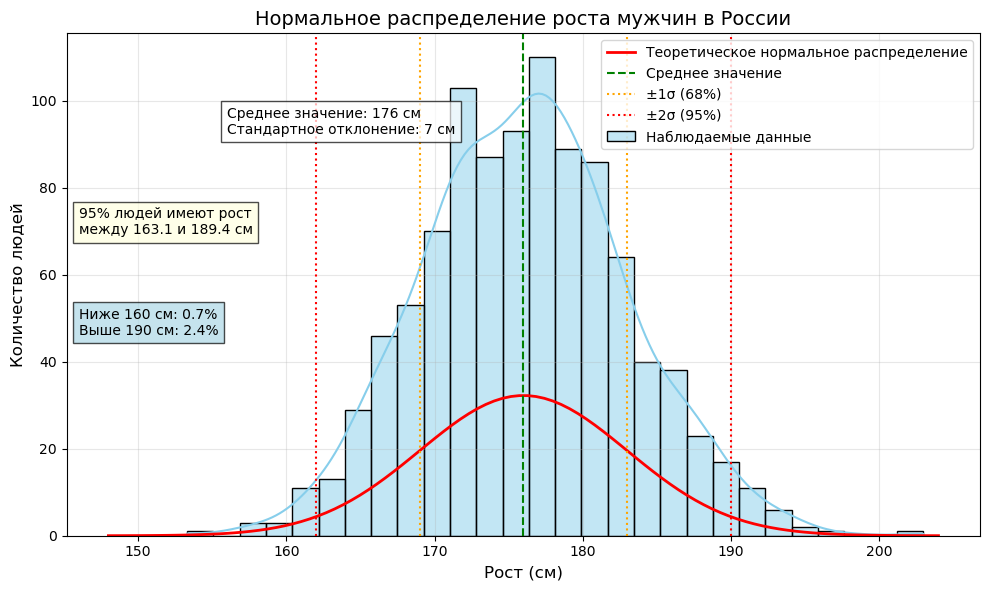

Минимальный рост в выборке: 153.3 см
Максимальный рост в выборке: 203.0 см
Средний рост: 176.1 см
Медианный рост: 176.2 см
Стандартное отклонение: 6.9 см
68% людей имеют рост между 169.0 и 183.0 см
95% людей имеют рост между 162.0 и 190.0 см
99.7% людей имеют рост между 155.0 и 197.0 см


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Настройка русского языка в графиках
plt.rcParams['font.family'] = 'DejaVu Sans'

# Задаем параметры нормального распределения для роста мужчин в России
# Средний рост мужчин примерно 176 см со стандартным отклонением 7 см
среднее = 176  # в сантиметрах
станд_отклонение = 7  # в сантиметрах

# Генерируем случайные значения роста для 1000 человек
np.random.seed(42)  # для воспроизводимости результатов
рост_выборка = np.random.normal(среднее, станд_отклонение, 1000)

# Создаем график
plt.figure(figsize=(10, 6))

# Гистограмма наблюдаемых значений
sns.histplot(рост_выборка, kde=True, color='skyblue', label='Наблюдаемые данные')

# Теоретическая кривая нормального распределения
x = np.linspace(среднее - 4*станд_отклонение, среднее + 4*станд_отклонение, 100)
y = stats.norm.pdf(x, среднее, станд_отклонение) * len(рост_выборка) * (x[1] - x[0])
plt.plot(x, y, 'r-', linewidth=2, label='Теоретическое нормальное распределение')

# Добавляем вертикальные линии для стандартных отклонений
plt.axvline(среднее, color='green', linestyle='--', label='Среднее значение')
plt.axvline(среднее + станд_отклонение, color='orange', linestyle=':', label='±1σ (68%)')
plt.axvline(среднее - станд_отклонение, color='orange', linestyle=':')
plt.axvline(среднее + 2*станд_отклонение, color='red', linestyle=':', label='±2σ (95%)')
plt.axvline(среднее - 2*станд_отклонение, color='red', linestyle=':')

# Подписи и заголовок
plt.title('Нормальное распределение роста мужчин в России', fontsize=14)
plt.xlabel('Рост (см)', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Добавим текстовые пояснения
plt.text(среднее - 20, plt.ylim()[1]*0.8, 
        f"Среднее значение: {среднее} см\nСтандартное отклонение: {станд_отклонение} см", 
        bbox=dict(facecolor='white', alpha=0.7))

# Рассчитаем и покажем процентили
низкий_рост = np.percentile(рост_выборка, 2.5)
высокий_рост = np.percentile(рост_выборка, 97.5)
plt.text(среднее - 30, plt.ylim()[1]*0.6, 
        f"95% людей имеют рост\nмежду {низкий_рост:.1f} и {высокий_рост:.1f} см",
        bbox=dict(facecolor='lightyellow', alpha=0.7))

# Анализ данных
ниже_160 = np.sum(рост_выборка < 160) / len(рост_выборка) * 100
выше_190 = np.sum(рост_выборка > 190) / len(рост_выборка) * 100
plt.text(среднее - 30, plt.ylim()[1]*0.4, 
        f"Ниже 160 см: {ниже_160:.1f}%\nВыше 190 см: {выше_190:.1f}%",
        bbox=dict(facecolor='lightblue', alpha=0.7))

plt.tight_layout()
plt.show()

# Посмотрим на интересные статистические характеристики
print(f"Минимальный рост в выборке: {рост_выборка.min():.1f} см")
print(f"Максимальный рост в выборке: {рост_выборка.max():.1f} см")
print(f"Средний рост: {рост_выборка.mean():.1f} см")
print(f"Медианный рост: {np.median(рост_выборка):.1f} см")
print(f"Стандартное отклонение: {рост_выборка.std():.1f} см")
print(f"68% людей имеют рост между {среднее - станд_отклонение:.1f} и {среднее + станд_отклонение:.1f} см")
print(f"95% людей имеют рост между {среднее - 2*станд_отклонение:.1f} и {среднее + 2*станд_отклонение:.1f} см")
print(f"99.7% людей имеют рост между {среднее - 3*станд_отклонение:.1f} и {среднее + 3*станд_отклонение:.1f} см")

# Свойства нормального распределения

## 1. Симметричность относительно среднего значения

Нормальное распределение симметрично относительно своего среднего значения (μ). Это означает, что левая и правая части графика относительно среднего значения являются зеркальным отражением друг друга.

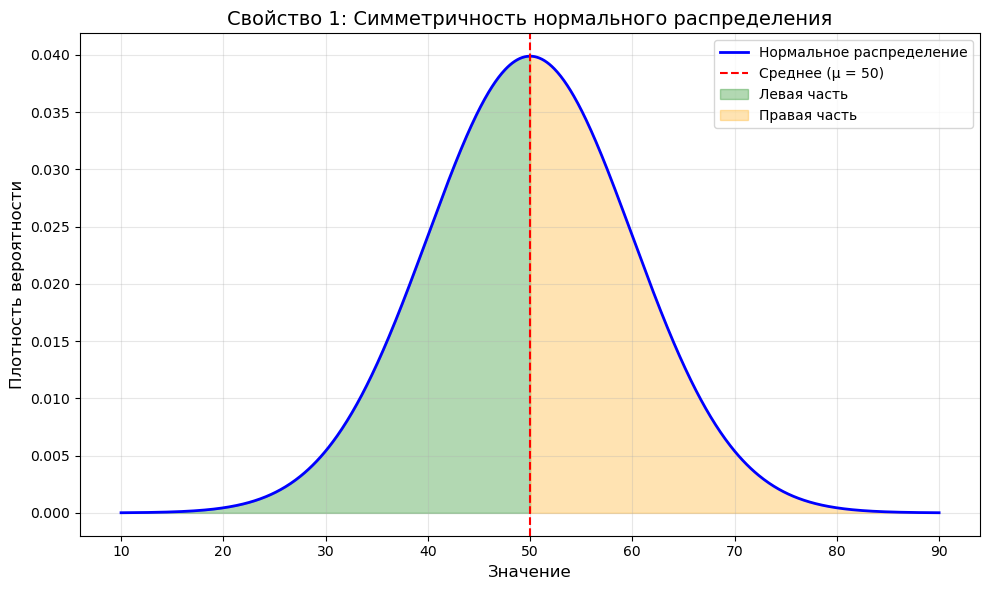

10-й процентиль: 37.08, расстояние от среднего: 12.92
90-й процентиль: 62.81, расстояние от среднего: 12.81
Проверка симметрии: True


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Настройка графика
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'

# Параметры нормального распределения
среднее = 50
станд_отклонение = 10
x = np.linspace(10, 90, 1000)
y = stats.norm.pdf(x, среднее, станд_отклонение)

# Построение графика
plt.plot(x, y, 'b-', linewidth=2, label='Нормальное распределение')
plt.axvline(среднее, color='r', linestyle='--', label=f'Среднее (μ = {среднее})')

# Закрашиваем левую и правую области для демонстрации симметрии
plt.fill_between(x[x <= среднее], y[x <= среднее], alpha=0.3, color='green', label='Левая часть')
plt.fill_between(x[x >= среднее], y[x >= среднее], alpha=0.3, color='orange', label='Правая часть')

plt.title('Свойство 1: Симметричность нормального распределения', fontsize=14)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Проверка симметричности с помощью процентилей
np.random.seed(42)
данные = np.random.normal(среднее, станд_отклонение, 10000)

# Расстояние от среднего до различных процентилей должно быть симметричным
p10 = np.percentile(данные, 10)
p90 = np.percentile(данные, 90)
print(f"10-й процентиль: {p10:.2f}, расстояние от среднего: {abs(среднее - p10):.2f}")
print(f"90-й процентиль: {p90:.2f}, расстояние от среднего: {abs(p90 - среднее):.2f}")
print(f"Проверка симметрии: {abs(abs(среднее - p10) - abs(p90 - среднее)) < 0.5}")

### Этот код визуализирует симметричное свойство нормального распределения, закрашивая левую и правую части разными цветами. Затем мы численно демонстрируем симметрию, показывая, что расстояния от среднего до 10-го и 90-го процентилей практически одинаковы.

## 2. Правило трех сигм (68-95-99.7)

Одно из важнейших свойств нормального распределения — это правило трех сигм, которое утверждает, что:

* Примерно 68% данных находятся в пределах ±1 стандартного отклонения от среднего
* Примерно 95% данных находятся в пределах ±2 стандартных отклонений от среднего
* Примерно 99.7% данных находятся в пределах ±3 стандартных отклонений от среднего

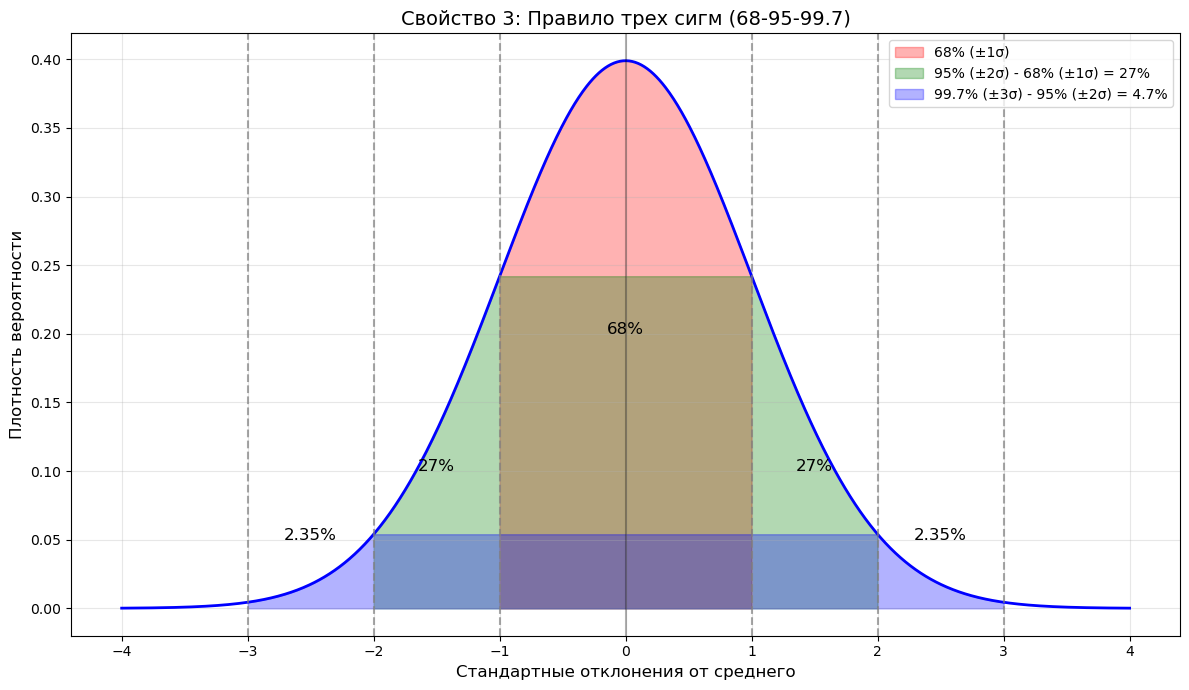

Процент данных в пределах ±1σ: 68.16% (теоретически ≈ 68%)
Процент данных в пределах ±2σ: 95.45% (теоретически ≈ 95%)
Процент данных в пределах ±3σ: 99.74% (теоретически ≈ 99.7%)


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(12, 7))
plt.rcParams['font.family'] = 'DejaVu Sans'

# Параметры нормального распределения
среднее = 0
станд_отклонение = 1
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, среднее, станд_отклонение)

# Построение графика
plt.plot(x, y, 'b-', linewidth=2)
plt.axvline(среднее, color='k', linestyle='-', alpha=0.3)

# Закрашиваем области для разных сигм
x_fill_1sigma = np.linspace(-1, 1, 1000)
y_fill_1sigma = stats.norm.pdf(x_fill_1sigma, среднее, станд_отклонение)
plt.fill_between(x_fill_1sigma, y_fill_1sigma, color='red', alpha=0.3, label='68% (±1σ)')

x_fill_2sigma = np.concatenate([np.linspace(-2, -1, 500), np.linspace(1, 2, 500)])
y_fill_2sigma = stats.norm.pdf(x_fill_2sigma, среднее, станд_отклонение)
plt.fill_between(x_fill_2sigma, y_fill_2sigma, color='green', alpha=0.3, label='95% (±2σ) - 68% (±1σ) = 27%')

x_fill_3sigma = np.concatenate([np.linspace(-3, -2, 500), np.linspace(2, 3, 500)])
y_fill_3sigma = stats.norm.pdf(x_fill_3sigma, среднее, станд_отклонение)
plt.fill_between(x_fill_3sigma, y_fill_3sigma, color='blue', alpha=0.3, label='99.7% (±3σ) - 95% (±2σ) = 4.7%')

# Добавляем вертикальные линии для стандартных отклонений
for i in range(1, 4):
    plt.axvline(среднее + i*станд_отклонение, color='gray', linestyle='--', alpha=0.7)
    plt.axvline(среднее - i*станд_отклонение, color='gray', linestyle='--', alpha=0.7)
    
plt.title('Свойство 3: Правило трех сигм (68-95-99.7)', fontsize=14)
plt.xlabel('Стандартные отклонения от среднего', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем текстовые пояснения
plt.text(0, 0.2, '68%', ha='center', fontsize=12)
plt.text(-1.5, 0.1, '27%', ha='center', fontsize=12)
plt.text(1.5, 0.1, '27%', ha='center', fontsize=12)
plt.text(-2.5, 0.05, '2.35%', ha='center', fontsize=12)
plt.text(2.5, 0.05, '2.35%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Проверка правила на сгенерированных данных
np.random.seed(42)
данные = np.random.normal(среднее, станд_отклонение, 100000)

в_пределах_1sigma = np.mean((данные >= среднее - станд_отклонение) & (данные <= среднее + станд_отклонение)) * 100
в_пределах_2sigma = np.mean((данные >= среднее - 2*станд_отклонение) & (данные <= среднее + 2*станд_отклонение)) * 100
в_пределах_3sigma = np.mean((данные >= среднее - 3*станд_отклонение) & (данные <= среднее + 3*станд_отклонение)) * 100

print(f"Процент данных в пределах ±1σ: {в_пределах_1sigma:.2f}% (теоретически ≈ 68%)")
print(f"Процент данных в пределах ±2σ: {в_пределах_2sigma:.2f}% (теоретически ≈ 95%)")
print(f"Процент данных в пределах ±3σ: {в_пределах_3sigma:.2f}% (теоретически ≈ 99.7%)")

### Этот код визуализирует правило трех сигм, закрашивая разными цветами области, соответствующие различным интервалам. Затем генерируются случайные данные и проверяется, какой процент значений фактически попадает в интервалы ±1σ, ±2σ и ±3σ. Эти значения должны быть близки к теоретическим 68%, 95% и 99.7%.

## 3. Центральная предельная теорема: суммы независимых случайных величин стремятся к нормальному распределению

Согласно центральной предельной теореме, сумма (или среднее) большого числа независимых случайных величин с одинаковым распределением стремится к нормальному распределению, даже если исходные величины не распределены нормально.

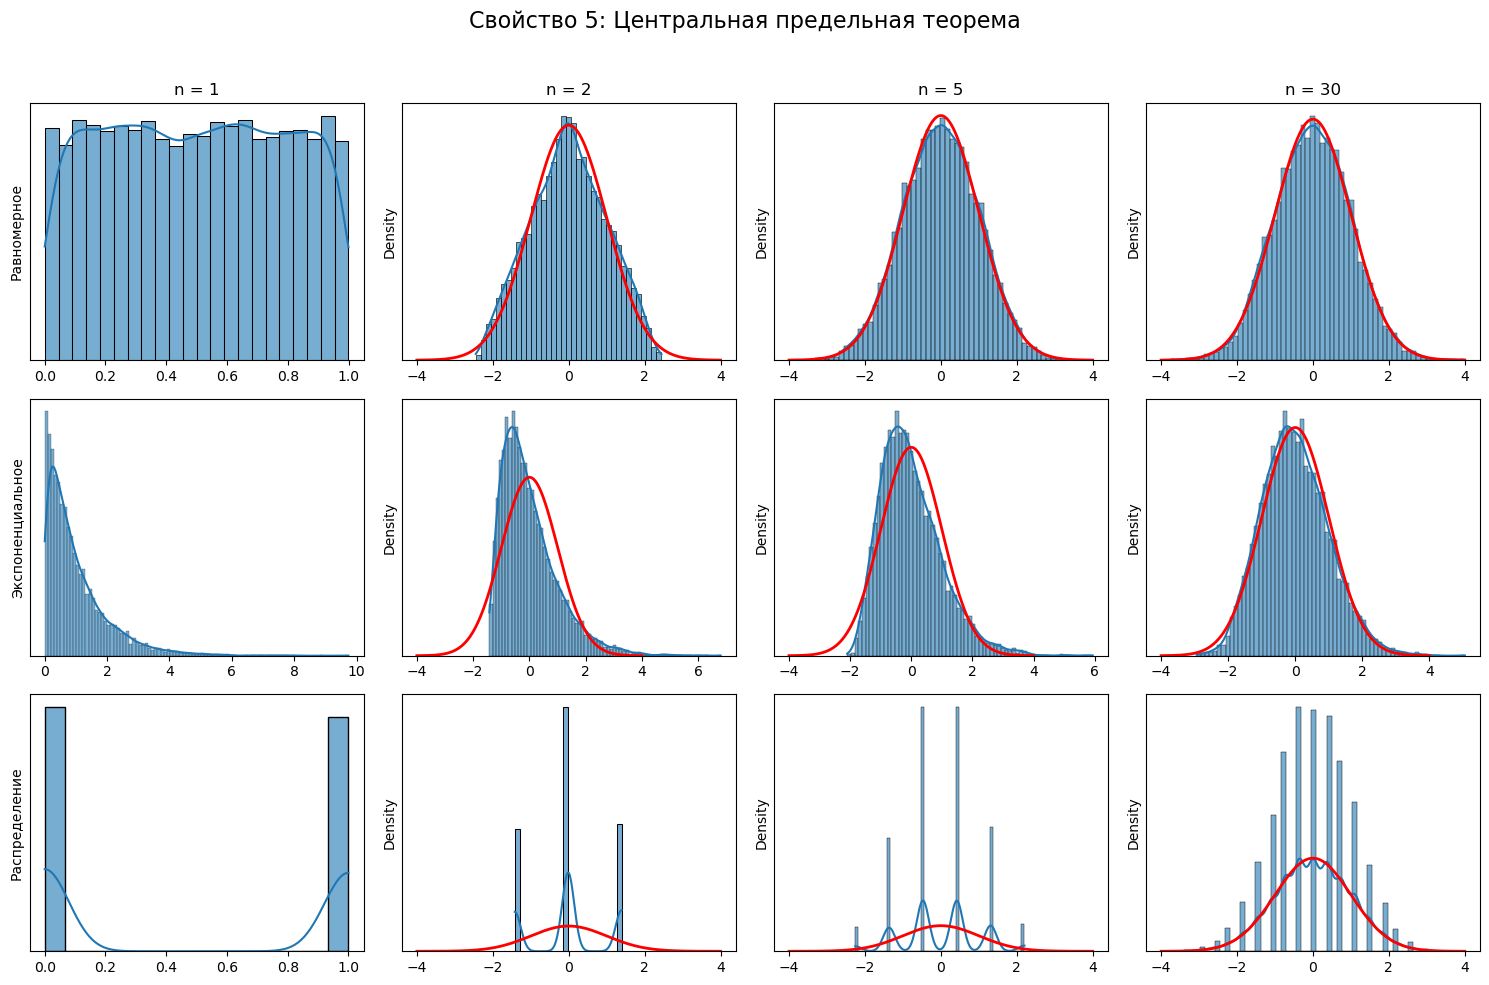


Распределение: Равномерное
n = 1, исходное распределение
n = 2, p-значение теста на нормальность: 0.00001, можно считать нормальным? False
n = 5, p-значение теста на нормальность: 0.00676, можно считать нормальным? False
n = 30, p-значение теста на нормальность: 0.21032, можно считать нормальным? True

Распределение: Экспоненциальное
n = 1, исходное распределение
n = 2, p-значение теста на нормальность: 0.00000, можно считать нормальным? False
n = 5, p-значение теста на нормальность: 0.00000, можно считать нормальным? False
n = 30, p-значение теста на нормальность: 0.00000, можно считать нормальным? False

Распределение: Бернулли
n = 1, исходное распределение
n = 2, p-значение теста на нормальность: 0.00000, можно считать нормальным? False
n = 5, p-значение теста на нормальность: 0.00000, можно считать нормальным? False
n = 30, p-значение теста на нормальность: 0.00000, можно считать нормальным? False


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.rcParams['font.family'] = 'DejaVu Sans'

# Функция для генерации сумм случайных величин
def сгенерировать_суммы(распределение, размер_выборки, n_слагаемых):
    результаты = []
    for _ in range(размер_выборки):
        слагаемые = распределение(n_слагаемых)
        результаты.append(np.sum(слагаемые))
    return np.array(результаты)

# Равномерное распределение между 0 и 1
равномерное = lambda n: np.random.uniform(0, 1, n)

# Экспоненциальное распределение с параметром lambda=1
экспоненциальное = lambda n: np.random.exponential(1, n)

# Биномиальное распределение с параметрами n=1, p=0.5 (монетка)
бросок_монеты = lambda n: np.random.binomial(1, 0.5, n)

# Размер выборки
размер_выборки = 10000

# Разное количество слагаемых для наблюдения эффекта ЦПТ
n_слагаемых_варианты = [1, 2, 5, 30]

# Создаем подграфики
распределения = [
    (равномерное, "Равномерное распределение"),
    (экспоненциальное, "Экспоненциальное распределение"),
    (бросок_монеты, "Распределение Бернулли (бросок монеты)")
]

for i, (распред, название) in enumerate(распределения):
    for j, n_слагаемых in enumerate(n_слагаемых_варианты):
        plt.subplot(3, 4, i*4 + j + 1)
        
        # Генерируем суммы
        суммы = сгенерировать_суммы(распред, размер_выборки, n_слагаемых)
        
        # Нормализуем суммы (вычитаем среднее и делим на стандартное отклонение * корень из n)
        if n_слагаемых > 1:
            # Нормализация для наблюдения сходимости к стандартному нормальному распределению
            нормализованные_суммы = (суммы - np.mean(суммы)) / (np.std(суммы))
            sns.histplot(нормализованные_суммы, kde=True, stat="density", alpha=0.6)
            
            # Добавляем стандартное нормальное распределение для сравнения
            x = np.linspace(-4, 4, 1000)
            y = stats.norm.pdf(x, 0, 1)
            plt.plot(x, y, 'r-', linewidth=2)
        else:
            # Для n=1 просто показываем исходное распределение
            sns.histplot(суммы, kde=True, stat="density", alpha=0.6)
        
        if j == 0:
            plt.ylabel(название.split()[0], fontsize=10)
        
        if i == 0:
            plt.title(f"n = {n_слагаемых}", fontsize=12)
            
        plt.yticks([])
        
plt.suptitle('Свойство 5: Центральная предельная теорема', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Тестируем близость к нормальному распределению для разных n
for название, распред in [("Равномерное", равномерное), ("Экспоненциальное", экспоненциальное), ("Бернулли", бросок_монеты)]:
    print(f"\nРаспределение: {название}")
    for n in [1, 2, 5, 30]:
        суммы = сгенерировать_суммы(распред, 1000, n)
        if n > 1:
            нормализованные_суммы = (суммы - np.mean(суммы)) / (np.std(суммы))
            _, p_значение = stats.shapiro(np.random.choice(нормализованные_суммы, size=1000))
            print(f"n = {n}, p-значение теста на нормальность: {p_значение:.5f}, " +
                  f"можно считать нормальным? {p_значение > 0.05}")
        else:
            print(f"n = {n}, исходное распределение")

#### Этот код демонстрирует центральную предельную теорему, показывая, как суммы случайных величин из разных распределений (равномерного, экспоненциального и распределения Бернулли) постепенно приближаются к нормальному распределению с увеличением числа слагаемых. Код генерирует суммы для разного количества слагаемых (n = 1, 2, 5, 30) и визуализирует, как распределение этих сумм постепенно становится всё более похожим на нормальное. Для n > 1 суммы нормализуются, чтобы можно было сравнить их с стандартным нормальным распределением.

# Примеры стандартного распределения для BTCUSDT

Анализируем дневную доходность BTCUSDT и показываем стандартное распределение доходности

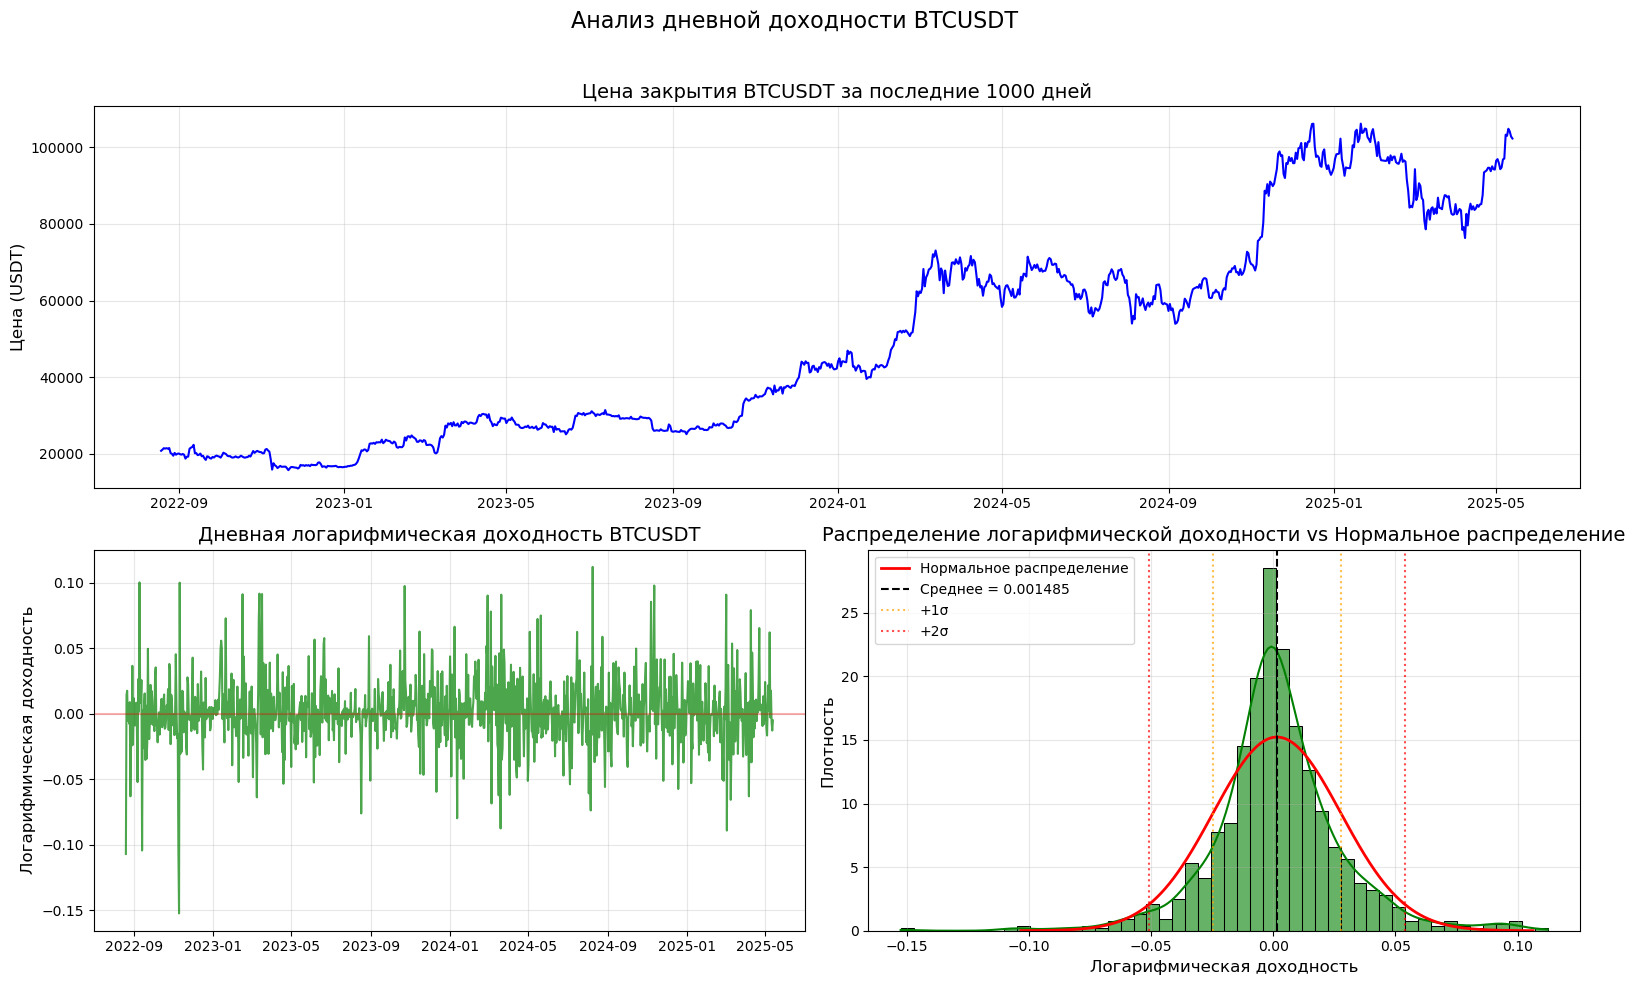

Анализ дневной доходности BTCUSDT за период 2022-08-19 - 2025-05-13
Количество торговых дней: 999
Минимальная цена: 15781.29 USDT
Максимальная цена: 106143.82 USDT
Текущая цена: 102268.52 USDT

Дневная логарифмическая доходность:
Среднее: 0.001485
Медиана: 0.000095
Стандартное отклонение: 0.026206
Минимум: -0.152568
Максимум: 0.112287


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import requests
from datetime import datetime, timedelta
import pytz

# Настройка для отображения русского языка в графиках
plt.rcParams['font.family'] = 'DejaVu Sans'

# Функция для получения исторических данных BTCUSDT с Binance
def получить_данные_binance(symbol, interval, limit=1000):
    """
    Получает исторические данные с Binance API
    
    Параметры:
    symbol (str): Торговая пара, например 'BTCUSDT'
    interval (str): Интервал свечей, например '1d', '1h', '15m'
    limit (int): Количество свечей, максимум 1000
    
    Возвращает:
    pandas.DataFrame: DataFrame с историческими данными
    """
    # Создаем URL запроса
    url = f"https://api.binance.com/api/v3/klines"
    
    # Параметры запроса
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    
    # Выполняем запрос к API
    response = requests.get(url, params=params)
    data = response.json()
    
    # Преобразуем в DataFrame
    columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 
               'close_time', 'quote_asset_volume', 'number_of_trades',
               'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    
    df = pd.DataFrame(data, columns=columns)
    
    # Преобразуем типы данных
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
    
    numeric_columns = ['open', 'high', 'low', 'close', 'volume',
                       'quote_asset_volume', 'taker_buy_base_asset_volume',
                       'taker_buy_quote_asset_volume']
    
    df[numeric_columns] = df[numeric_columns].astype(float)
    
    # Устанавливаем open_time в качестве индекса
    df.set_index('open_time', inplace=True)
    
    return df

# Получаем дневные данные BTCUSDT за последние 1000 дней (максимум разрешенный API)
btc_data = получить_данные_binance('BTCUSDT', '1d', limit=1000)

# Рассчитываем разные типы доходностей
# 1. Простая доходность
btc_data['simple_return'] = btc_data['close'].pct_change()

# 2. Логарифмическая доходность (часто используется в финансовом анализе)
btc_data['log_return'] = np.log(btc_data['close'] / btc_data['close'].shift(1))

# Удаляем первую строку с NaN
btc_data = btc_data.dropna()

# Рассчитываем статистики доходностей
простая_доходность_среднее = btc_data['simple_return'].mean()
простая_доходность_годовая = (1 + простая_доходность_среднее)**365 - 1
простая_доходность_стд = btc_data['simple_return'].std()

лог_доходность_среднее = btc_data['log_return'].mean()
лог_доходность_годовая = лог_доходность_среднее * 365
лог_доходность_стд = btc_data['log_return'].std()

# Создаем фигуру для графиков
plt.figure(figsize=(16, 10))

# 1. График цены BTC
plt.subplot(2, 1, 1)
plt.plot(btc_data.index, btc_data['close'], color='blue')
plt.title('Цена закрытия BTCUSDT за последние 1000 дней', fontsize=14)
plt.ylabel('Цена (USDT)', fontsize=12)
plt.grid(True, alpha=0.3)

# 2. График дневной доходности
plt.subplot(2, 2, 3)
plt.plot(btc_data.index, btc_data['log_return'], color='green', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Дневная логарифмическая доходность BTCUSDT', fontsize=14)
plt.ylabel('Логарифмическая доходность', fontsize=12)
plt.grid(True, alpha=0.3)

# 3. Распределение дневной логарифмической доходности
plt.subplot(2, 2, 4)
sns.histplot(btc_data['log_return'], bins=50, kde=True, stat='density', color='green', alpha=0.6)

# Добавляем теоретическое нормальное распределение с теми же параметрами
mu = лог_доходность_среднее
sigma = лог_доходность_стд
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r-', linewidth=2, label='Нормальное распределение')

# Добавляем вертикальные линии для среднего значения и стандартных отклонений
plt.axvline(mu, color='black', linestyle='--', label=f'Среднее = {mu:.6f}')
plt.axvline(mu + sigma, color='orange', linestyle=':', alpha=0.7, label='+1σ')
plt.axvline(mu - sigma, color='orange', linestyle=':', alpha=0.7)
plt.axvline(mu + 2*sigma, color='red', linestyle=':', alpha=0.7, label='+2σ')
plt.axvline(mu - 2*sigma, color='red', linestyle=':', alpha=0.7)

plt.title('Распределение логарифмической доходности vs Нормальное распределение', fontsize=14)
plt.xlabel('Логарифмическая доходность', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем общий заголовок
plt.suptitle('Анализ дневной доходности BTCUSDT', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Вывод основной информации о средней дневной доходности
print(f"Анализ дневной доходности BTCUSDT за период {btc_data.index[0].date()} - {btc_data.index[-1].date()}")
print(f"Количество торговых дней: {len(btc_data)}")
print(f"Минимальная цена: {btc_data['close'].min():.2f} USDT")
print(f"Максимальная цена: {btc_data['close'].max():.2f} USDT")
print(f"Текущая цена: {btc_data['close'].iloc[-1]:.2f} USDT")
print("\nДневная логарифмическая доходность:")
print(f"Среднее: {лог_доходность_среднее:.6f}")
print(f"Медиана: {btc_data['log_return'].median():.6f}")
print(f"Стандартное отклонение: {лог_доходность_стд:.6f}")
print(f"Минимум: {btc_data['log_return'].min():.6f}")
print(f"Максимум: {btc_data['log_return'].max():.6f}")

# Толстые хвосты распределения доходности: почему они убивают депозиты трейдеров

## 1. Что такое толстые хвосты распределения
Толстые хвосты (fat tails, heavy tails) — это свойство статистического распределения, при котором вероятность экстремальных событий значительно выше, чем предсказывает нормальное (гауссово) распределение

Повышенная вероятность экстремальных событий — события, отклоняющиеся от среднего на 3, 4, 5 и более стандартных отклонений, происходят значительно чаще, чем предсказывает нормальное распределение

В математическом выражении, распределение с толстыми хвостами имеет положительный эксцесс (избыточный куртозис), что означает, что оно имеет более высокий и острый пик в центре и более "толстые" хвосты по сравнению с нормальным распределением с той же дисперсией

### Обычный эксцесс (Куртозис)
Куртозис (kurtosis) или эксцесс — это статистическая мера, характеризующая "остроту пика" и "толщину хвостов" распределения по сравнению с нормальным распределением

Обычный эксцесс (Куртозис)
$$Kurt = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^4}{(\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2)^2} = \frac{\mu_4}{\sigma^4}$$, где:
- $\mu_4$ - четвертый центральный момент распределения
- $\sigma$ - стандартное отклонение
- $\bar{x}$ - среднее значение выборки
- $n$ - размер выборки

Избыточный эксцесс:
$$ExcessKurt = Kurt - 3 = \frac{\mu_4}{\sigma^4} - 3$$

## Примеры распределений с толстыми хвостами:

* Распределение Стьюдента (t-распределение) — часто используется для моделирования финансовых доходностей
* Распределение Коши — экстремальный пример распределения с очень толстыми хвостами
* Распределения Леви и Парето — следуют степенному закону убывания
* Логнормальное распределение — имеет более толстый правый хвост

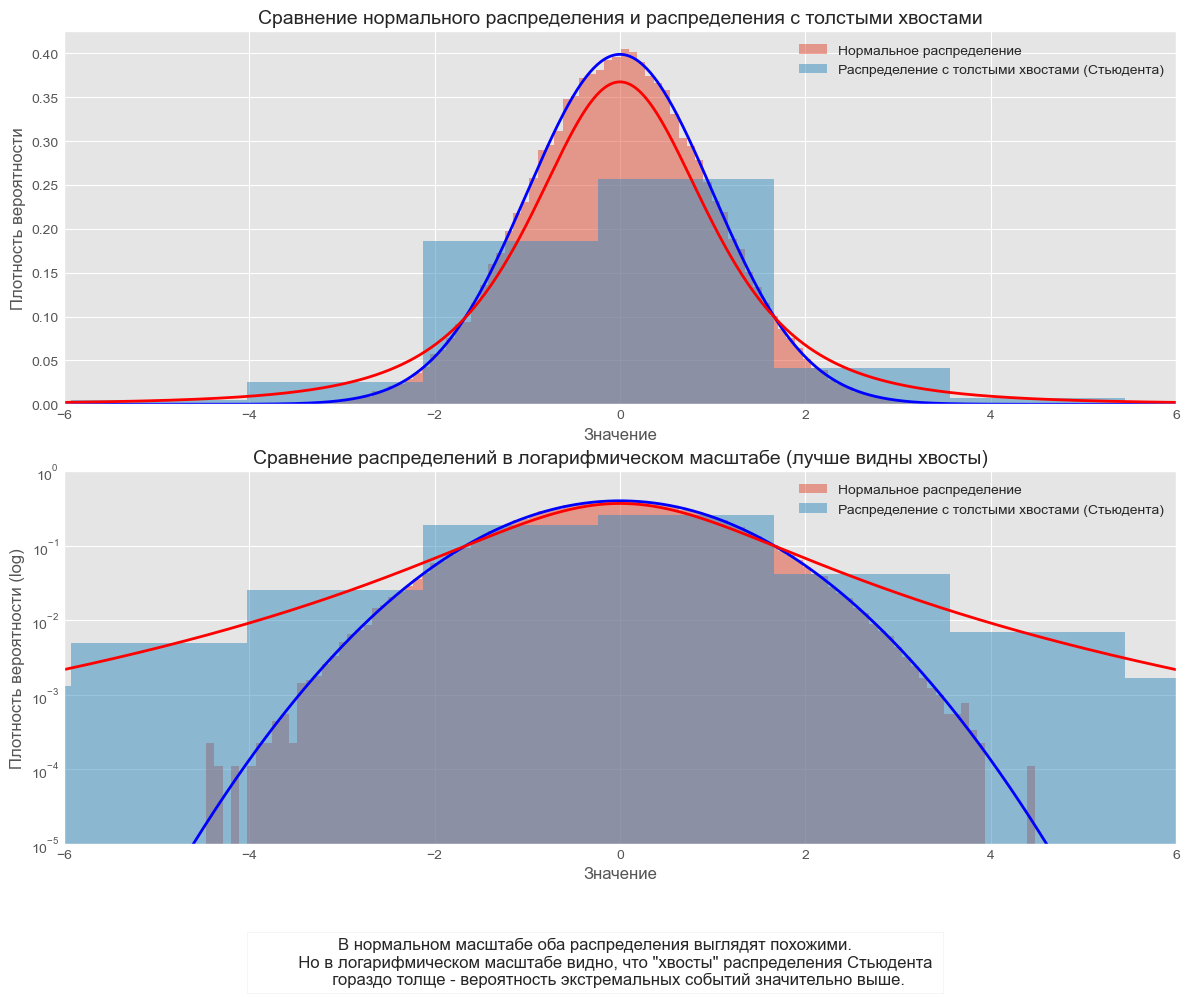

Процент значений за пределами 3σ:
  Нормальное распределение: 0.2640% (теоретически 0.27%)
  Распределение с толстыми хвостами: 5.8220%
  Соотношение: в 22.1 раз больше

Процент значений за пределами 4σ:
  Нормальное распределение: 0.0050% (теоретически 0.006%)
  Распределение с толстыми хвостами: 2.8240%
  Соотношение: в 564.8 раз больше


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Настройка графика
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))

# Количество генерируемых точек
n = 100000

# Генерируем данные
np.random.seed(42)  # для воспроизводимости
normal_data = np.random.normal(0, 1, n)  # Нормальное распределение (среднее=0, стд=1)
fat_tails_data = np.random.standard_t(df=3, size=n)  # Распределение Стьюдента (df=3)

# Создаем два подграфика
plt.subplot(2, 1, 1)

# 1. Обычный масштаб
plt.hist(normal_data, bins=100, alpha=0.5, density=True, label='Нормальное распределение')
plt.hist(fat_tails_data, bins=100, alpha=0.5, density=True, label='Распределение с толстыми хвостами (Стьюдента)')

# Добавляем теоретические кривые распределения
x = np.linspace(-6, 6, 1000)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'b-', linewidth=2)
plt.plot(x, stats.t.pdf(x, 3), 'r-', linewidth=2)

plt.title('Сравнение нормального распределения и распределения с толстыми хвостами', fontsize=14)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend()
plt.xlim(-6, 6)

# 2. Логарифмический масштаб (хорошо видны хвосты)
plt.subplot(2, 1, 2)

plt.hist(normal_data, bins=100, alpha=0.5, density=True, label='Нормальное распределение')
plt.hist(fat_tails_data, bins=100, alpha=0.5, density=True, label='Распределение с толстыми хвостами (Стьюдента)')

plt.plot(x, stats.norm.pdf(x, 0, 1), 'b-', linewidth=2)
plt.plot(x, stats.t.pdf(x, 3), 'r-', linewidth=2)

plt.yscale('log')  # Логарифмический масштаб по оси Y
plt.title('Сравнение распределений в логарифмическом масштабе (лучше видны хвосты)', fontsize=14)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Плотность вероятности (log)', fontsize=12)
plt.legend()
plt.xlim(-6, 6)
plt.ylim(1e-5, 1)

# Добавляем пояснение для наглядности
plt.tight_layout()
plt.figtext(0.5, 0.01, 
          """В нормальном масштабе оба распределения выглядят похожими.
          Но в логарифмическом масштабе видно, что "хвосты" распределения Стьюдента 
          гораздо толще - вероятность экстремальных событий значительно выше.""", 
          ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.subplots_adjust(bottom=0.15)
plt.show()

# Вычисляем процент выбросов за пределами 3 и 4 стандартных отклонений
sigma3_normal = np.mean(np.abs(normal_data) > 3) * 100
sigma4_normal = np.mean(np.abs(normal_data) > 4) * 100

sigma3_fat = np.mean(np.abs(fat_tails_data) > 3) * 100
sigma4_fat = np.mean(np.abs(fat_tails_data) > 4) * 100

print(f"Процент значений за пределами 3σ:")
print(f"  Нормальное распределение: {sigma3_normal:.4f}% (теоретически 0.27%)")
print(f"  Распределение с толстыми хвостами: {sigma3_fat:.4f}%")
print(f"  Соотношение: в {sigma3_fat/sigma3_normal:.1f} раз больше\n")

print(f"Процент значений за пределами 4σ:")
print(f"  Нормальное распределение: {sigma4_normal:.4f}% (теоретически 0.006%)")
print(f"  Распределение с толстыми хвостами: {sigma4_fat:.4f}%")
print(f"  Соотношение: в {sigma4_fat/sigma4_normal:.1f} раз больше")

# 2. Почему возникают толстые хвосты в финансовых распределениях
Толстые хвосты в распределении доходностей финансовых активов возникают по нескольким причинам:

* Кластеризация волатильности: Периоды высокой волатильности имеют тенденцию группироваться. После значительного движения цены часто следуют другие большие движения
* Нелинейная обратная связь: Рынки имеют механизмы усиления, такие как "margin calls", автоматические стоп-лоссы, следование за трендом, которые могут усиливать движения цены и ликвидации
* Стадное поведение: Инвесторы часто действуют коллективно, особенно в периоды страха или эйфории, что приводит к более резким движениям цены
Недостаточная ликвидность: В периоды шока ликвидность может резко сокращаться, усиливая движения цены

## Способы учета толстых хвостов в управлении рисками:
* Использование альтернативных распределений — распределение Стьюдента, распределение с смешанной волатильностью (mixture of normals)
* Conditional Value at Risk (CVaR) / Expected Shortfall (ES)
* Стресс-тестирование и сценарный анализ
* Экстремальная теория значений (Extreme Value Theory)

# 3. Почему толстые хвосты "убивают" депозиты трейдеров

## 1. Недооценка риска:

Многие трейдеры и даже профессиональные риск-менеджеры используют модели, основанные на предположении о нормальном распределении (например, Value at Risk с нормальным распределением). Эти модели существенно недооценивают вероятность экстремальных движений цены


### 2. Проблемы с плечом:

Многие трейдеры используют плечо для увеличения потенциальной прибыли. Размер левериджа часто рассчитывается на основе "обычной" волатильности. Экстремальное движение цены может привести к потере всего депозита или даже к отрицательному балансу


### 3. Неэффективность стоп-лоссов:

При резких движениях цены стоп-лоссы могут срабатывать по ценам, значительно худшим, чем установленные (проскальзывание)
В периоды низкой ликвидности или рыночных шоков разрыв между заявленной и исполненной ценой может быть огромным


### 4. Психологические ловушки:

Трейдеры склонны экстраполировать недавний опыт, недооценивая вероятность экстремальных событий. После серии "нормальных" торговых дней трейдеры часто увеличивают размер позиций, что делает их уязвимыми к резким движениям


### 5. Каскадные эффекты:

Особенно опасны для систематических трейдеров или алготрейдеров
Один резкий убыток может запустить цепочку ликвидаций позиций, что приводит к еще большим убыткам

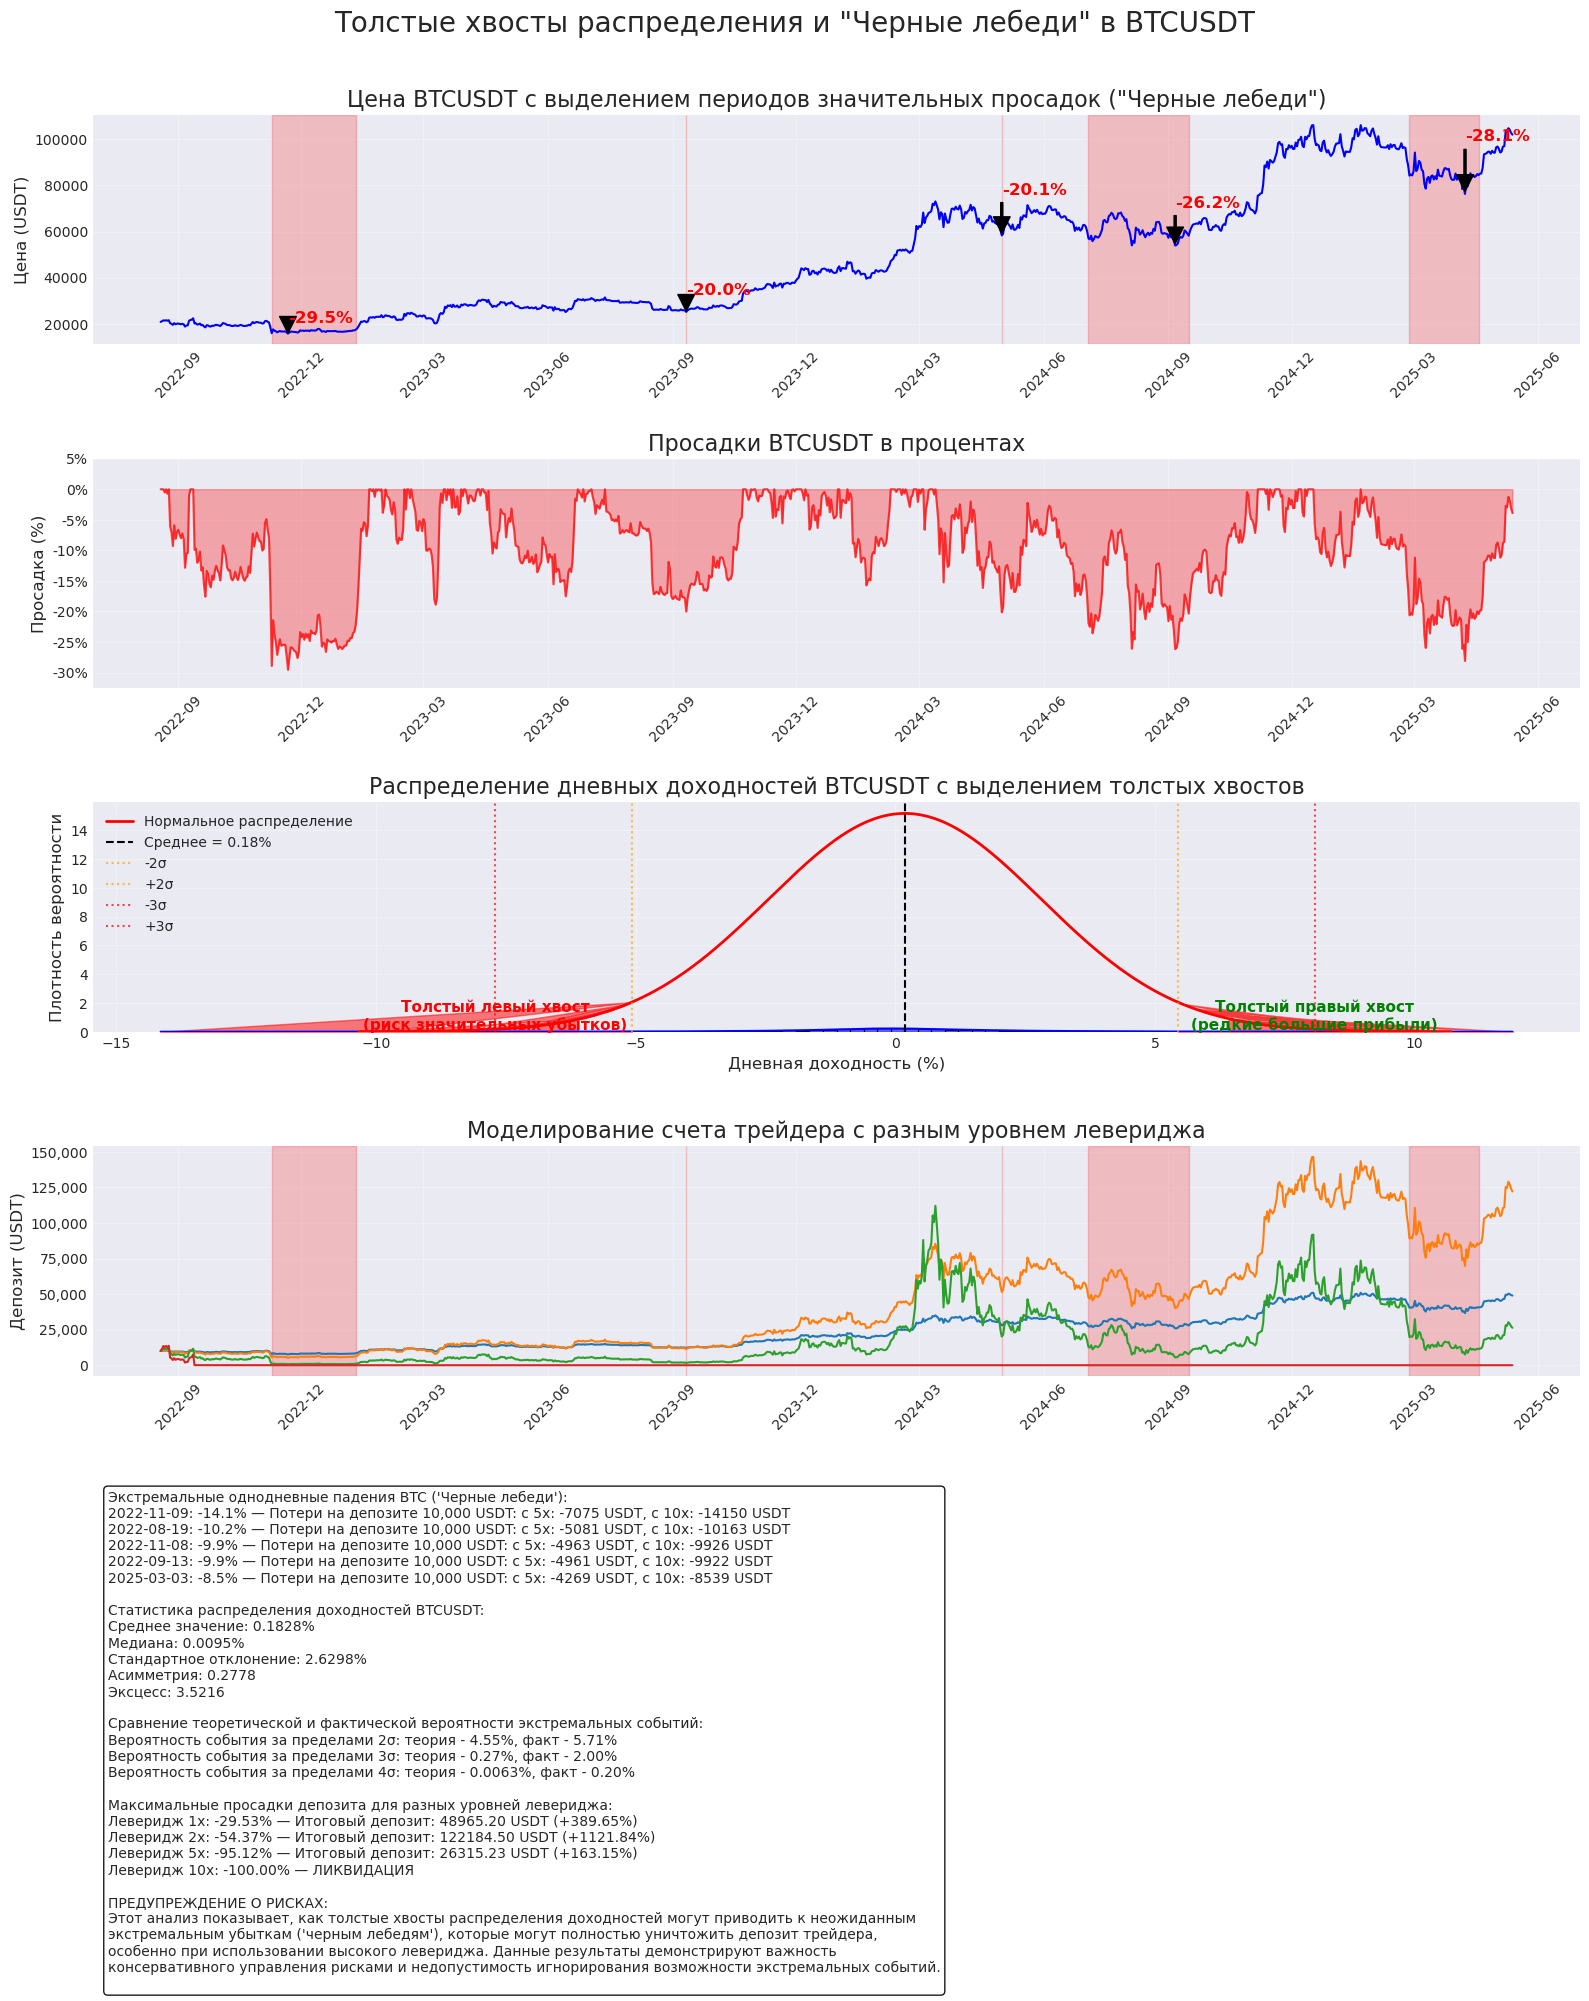

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy import stats
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (16, 10)

# Функция для получения исторических данных BTCUSDT с Binance
def получить_данные_binance(symbol, interval, limit=1000):
    """
    Получает исторические данные с Binance API
    
    Параметры:
    symbol (str): Торговая пара, например 'BTCUSDT'
    interval (str): Интервал свечей, например '1d', '1h', '15m'
    limit (int): Количество свечей, максимум 1000
    
    Возвращает:
    pandas.DataFrame: DataFrame с историческими данными
    """
    url = f"https://api.binance.com/api/v3/klines"
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 
               'close_time', 'quote_asset_volume', 'number_of_trades',
               'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    
    df = pd.DataFrame(data, columns=columns)
    
    # Преобразуем типы данных
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
    
    numeric_columns = ['open', 'high', 'low', 'close', 'volume',
                       'quote_asset_volume', 'taker_buy_base_asset_volume',
                       'taker_buy_quote_asset_volume']
    
    df[numeric_columns] = df[numeric_columns].astype(float)
    df.set_index('open_time', inplace=True)
    
    return df

# Получаем дневные данные BTCUSDT за последние 1000 дней
btc_data = получить_данные_binance('BTCUSDT', '1d', limit=1000)

# Рассчитываем дневные доходности
btc_data['доходность'] = btc_data['close'].pct_change()
btc_data = btc_data.dropna()

# Рассчитываем просадки (drawdowns)
def расчет_просадок(цены):
    """Рассчитывает просадки для ряда цен"""
    максимум_до_сих_пор = цены.cummax()
    просадка = (цены - максимум_до_сих_пор) / максимум_до_сих_пор
    return просадка

btc_data['просадка'] = расчет_просадок(btc_data['close'])

# Находим периоды значительных просадок (черные лебеди)
значительные_просадки = btc_data[btc_data['просадка'] <= -0.20].copy()  # Просадка более 20%
периоды_просадок = []

if len(значительные_просадки) > 0:
    # Определяем начальную и конечную даты просадок
    текущий_период = {'начало': значительные_просадки.index[0], 'мин_просадка': значительные_просадки['просадка'].iloc[0]}
    
    for i in range(1, len(значительные_просадки)):
        текущая_дата = значительные_просадки.index[i]
        предыдущая_дата = значительные_просадки.index[i-1]
        разница_дней = (текущая_дата - предыдущая_дата).days
        
        if разница_дней > 30:  # Если разрыв больше 30 дней, считаем новым периодом
            текущий_период['конец'] = предыдущая_дата
            периоды_просадок.append(текущий_период)
            текущий_период = {'начало': текущая_дата, 'мин_просадка': значительные_просадки['просадка'].iloc[i]}
        else:
            # Обновляем минимальную просадку, если текущая хуже
            if значительные_просадки['просадка'].iloc[i] < текущий_период['мин_просадка']:
                текущий_период['мин_просадка'] = значительные_просадки['просадка'].iloc[i]
    
    # Добавляем последний период
    текущий_период['конец'] = значительные_просадки.index[-1]
    периоды_просадок.append(текущий_период)

# Создаем фигуру с несколькими графиками
fig = plt.figure(figsize=(16, 20))

# 1. График цены BTCUSDT с выделением "черных лебедей"
ax1 = fig.add_subplot(5, 1, 1)
ax1.plot(btc_data.index, btc_data['close'], label='BTCUSDT', color='blue')
ax1.set_title('Цена BTCUSDT с выделением периодов значительных просадок ("Черные лебеди")', fontsize=16)
ax1.set_ylabel('Цена (USDT)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Выделяем периоды "черных лебедей" на графике
for период in периоды_просадок:
    начало = период['начало']
    конец = период['конец']
    мин_просадка = период['мин_просадка']
    
    # Находим минимальную цену в этот период
    мин_цена = btc_data.loc[начало:конец, 'close'].min()
    мин_цена_дата = btc_data.loc[начало:конец, 'close'].idxmin()
    
    # Выделяем период просадки
    ax1.axvspan(начало, конец, alpha=0.2, color='red')
    
    # Добавляем аннотацию
    ax1.annotate(f"{мин_просадка*100:.1f}%", 
                xy=(мин_цена_дата, мин_цена),
                xytext=(мин_цена_дата, мин_цена*1.3),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                fontsize=12, color='red', fontweight='bold')

# Форматируем ось X
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# 2. График просадок
ax2 = fig.add_subplot(5, 1, 2)
ax2.fill_between(btc_data.index, 0, btc_data['просадка']*100, color='red', alpha=0.3)
ax2.plot(btc_data.index, btc_data['просадка']*100, color='red', linestyle='-', alpha=0.7)
ax2.set_title('Просадки BTCUSDT в процентах', fontsize=16)
ax2.set_ylabel('Просадка (%)', fontsize=12)
ax2.set_ylim(btc_data['просадка'].min()*100*1.1, 5)  # Небольшой запас сверху
ax2.grid(True, alpha=0.3)

# Форматируем ось Y для отображения в процентах
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Форматируем ось X
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# 3. Распределение дневных доходностей (демонстрация толстых хвостов)
ax3 = fig.add_subplot(5, 1, 3)

# Строим гистограмму доходностей
sns.histplot(btc_data['доходность']*100, bins=100, kde=True, stat='density', color='blue', alpha=0.6, ax=ax3)

# Добавляем теоретическое нормальное распределение
mu = btc_data['доходность'].mean()
sigma = btc_data['доходность'].std()
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)
ax3.plot(x*100, y, 'r-', linewidth=2, label='Нормальное распределение')

# Выделяем "толстые хвосты"
левая_граница = mu - 2*sigma
правая_граница = mu + 2*sigma

# Заполняем левый "толстый хвост"
левый_хвост_x = btc_data['доходность'][btc_data['доходность'] <= левая_граница] * 100
левый_хвост_y = np.zeros_like(левый_хвост_x)
for i, val in enumerate(левый_хвост_x):
    левый_хвост_y[i] = stats.norm.pdf(левый_хвост_x.iloc[i]/100, mu, sigma)

ax3.fill_between(левый_хвост_x, левый_хвост_y, 0, color='red', alpha=0.5)

# Заполняем правый "толстый хвост"
правый_хвост_x = btc_data['доходность'][btc_data['доходность'] >= правая_граница] * 100
правый_хвост_y = np.zeros_like(правый_хвост_x)
for i, val in enumerate(правый_хвост_x):
    правый_хвост_y[i] = stats.norm.pdf(правый_хвост_x.iloc[i]/100, mu, sigma)

ax3.fill_between(правый_хвост_x, правый_хвост_y, 0, color='red', alpha=0.5)

# Добавляем вертикальные линии для стандартных отклонений
ax3.axvline(mu*100, color='black', linestyle='--', label=f'Среднее = {mu*100:.2f}%')
ax3.axvline((mu - 2*sigma)*100, color='orange', linestyle=':', alpha=0.7, label='-2σ')
ax3.axvline((mu + 2*sigma)*100, color='orange', linestyle=':', alpha=0.7, label='+2σ')
ax3.axvline((mu - 3*sigma)*100, color='red', linestyle=':', alpha=0.7, label='-3σ')
ax3.axvline((mu + 3*sigma)*100, color='red', linestyle=':', alpha=0.7, label='+3σ')

# Добавляем текст для толстых хвостов
ax3.text(mu*100 - 3*sigma*100, 0.15, "Толстый левый хвост\n(риск значительных убытков)", 
        color='red', fontsize=11, ha='center', fontweight='bold')
ax3.text(mu*100 + 3*sigma*100, 0.15, "Толстый правый хвост\n(редкие большие прибыли)", 
        color='green', fontsize=11, ha='center', fontweight='bold')

ax3.set_title('Распределение дневных доходностей BTCUSDT с выделением толстых хвостов', fontsize=16)
ax3.set_xlabel('Дневная доходность (%)', fontsize=12)
ax3.set_ylabel('Плотность вероятности', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Симуляция роста депозита с учетом просадок (демонстрация "фатальности" черных лебедей)
ax4 = fig.add_subplot(5, 1, 4)

# Симулируем счет трейдера с разными уровнями риска
начальный_депозит = 10000  # Начальный депозит в USDT
леверидж_варианты = [1, 2, 5, 10]  # Разные уровни левериджа
симуляции = {}

for леверидж in леверидж_варианты:
    депозит = начальный_депозит
    история_счета = [депозит]
    
    for i in range(1, len(btc_data)):
        доходность = btc_data['доходность'].iloc[i]
        # Рассчитываем изменение депозита с учетом левериджа
        изменение = депозит * доходность * леверидж
        депозит += изменение
        
        # Если депозит становится отрицательным или слишком маленьким, считаем его ликвидированным
        if депозит <= 0 or депозит < начальный_депозит * 0.001:  # Ликвидация при депозите менее 0.1% от начального
            депозит = 0
            история_счета.append(депозит)
            # Заполняем остаток истории нулями
            история_счета.extend([0] * (len(btc_data) - i - 1))
            break
        
        история_счета.append(депозит)
    
    симуляции[f"Леверидж {леверидж}x"] = история_счета

# Рисуем графики для разных уровней левериджа
for метка, история in симуляции.items():
    ax4.plot(btc_data.index, история, label=метка)

# Выделяем периоды "черных лебедей" на графике
for период in периоды_просадок:
    начало = период['начало']
    конец = период['конец']
    мин_просадка = период['мин_просадка']
    
    # Выделяем период просадки
    ax4.axvspan(начало, конец, alpha=0.2, color='red')

ax4.set_title('Моделирование счета трейдера с разным уровнем левериджа', fontsize=16)
ax4.set_ylabel('Депозит (USDT)', fontsize=12)
ax4.grid(True, alpha=0.3)

# Форматируем ось Y для отображения в денежном формате
ax4.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:,.0f}'))

# Форматируем ось X
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Находим экстремальные падения в дневной доходности (потенциальные "черные лебеди")
топ_падения = btc_data.sort_values(by='доходность').head(5)
топ_падения['доходность_pct'] = топ_падения['доходность'] * 100
топ_падения['потери_10k_леверидж5'] = 10000 * топ_падения['доходность'] * 5  # Потери на депозите 10,000 USDT с левериджем 5x
топ_падения['потери_10k_леверидж10'] = 10000 * топ_падения['доходность'] * 10  # Потери с левериджем 10x

# Создаем текстовый блок для экстремальных однодневных падений
ax5 = fig.add_subplot(5, 1, 5)
ax5.axis('off')

info_text = "Экстремальные однодневные падения BTC ('Черные лебеди'):\n"
for idx, row in топ_падения.iterrows():
    дата = idx.strftime('%Y-%m-%d')
    доходность = row['доходность_pct']
    потери_5x = row['потери_10k_леверидж5']
    потери_10x = row['потери_10k_леверидж10']
    
    info_text += f"{дата}: {доходность:.1f}% — Потери на депозите 10,000 USDT: с 5x: {потери_5x:.0f} USDT, с 10x: {потери_10x:.0f} USDT\n"

# Добавляем статистику распределения
статистика_текст = f"""
Статистика распределения доходностей BTCUSDT:
Среднее значение: {btc_data['доходность'].mean()*100:.4f}%
Медиана: {btc_data['доходность'].median()*100:.4f}%
Стандартное отклонение: {btc_data['доходность'].std()*100:.4f}%
Асимметрия: {stats.skew(btc_data['доходность']):.4f}
Эксцесс: {stats.kurtosis(btc_data['доходность']):.4f}

Сравнение теоретической и фактической вероятности экстремальных событий:
Вероятность события за пределами 2σ: теория - 4.55%, факт - {len(btc_data[abs(btc_data['доходность'] - mu) > 2*sigma]) / len(btc_data) * 100:.2f}%
Вероятность события за пределами 3σ: теория - 0.27%, факт - {len(btc_data[abs(btc_data['доходность'] - mu) > 3*sigma]) / len(btc_data) * 100:.2f}%
Вероятность события за пределами 4σ: теория - 0.0063%, факт - {len(btc_data[abs(btc_data['доходность'] - mu) > 4*sigma]) / len(btc_data) * 100:.2f}%

Максимальные просадки депозита для разных уровней левериджа:
"""

# Рассчитываем максимальные просадки для каждого уровня левериджа
макс_просадки = {}
for метка, история in симуляции.items():
    макс_до_сих_пор = 0
    макс_просадка = 0
    
    for значение in история:
        макс_до_сих_пор = max(макс_до_сих_пор, значение)
        текущая_просадка = (значение - макс_до_сих_пор) / макс_до_сих_пор if макс_до_сих_пор > 0 else 0
        макс_просадка = min(макс_просадка, текущая_просадка)
    
    макс_просадки[метка] = макс_просадка
    финальный_депозит = история[-1]
    if финальный_депозит == 0:
        статус = "ЛИКВИДАЦИЯ"
    else:
        статус = f"Итоговый депозит: {финальный_депозит:.2f} USDT (+{(финальный_депозит/начальный_депозит - 1)*100:.2f}%)"
    
    статистика_текст += f"{метка}: {макс_просадка*100:.2f}% — {статус}\n"

# Добавляем предупреждение о рисках
статистика_текст += """
ПРЕДУПРЕЖДЕНИЕ О РИСКАХ:
Этот анализ показывает, как толстые хвосты распределения доходностей могут приводить к неожиданным
экстремальным убыткам ('черным лебедям'), которые могут полностью уничтожить депозит трейдера,
особенно при использовании высокого левериджа. Данные результаты демонстрируют важность
консервативного управления рисками и недопустимость игнорирования возможности экстремальных событий.
"""

ax5.text(0.01, 1.0, info_text + статистика_текст, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Общий заголовок и настройка макета
plt.suptitle('Толстые хвосты распределения и "Черные лебеди" в BTCUSDT', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.subplots_adjust(hspace=0.5)

plt.show()

# 4. Черный лебедь и его связь с хвостами распределения
Термин "Черный лебедь" (Black Swan) был популяризирован Нассимом Талебом для описания событий, которые:

* Являются аномальными и неожиданными (крайне маловероятными с точки зрения стандартных прогнозов)
* Имеют экстремальное влияние
* Ретроспективно кажутся предсказуемыми и объяснимыми

## Связь с толстыми хвостами распределения:
* "Черные лебеди" — это и есть те самые события, которые находятся в дальних областях хвостов распределения. Толстые хвосты распределения означают, что вероятность "черных лебедей" гораздо выше, чем предсказывает нормальное распределение
* События, отклоняющиеся от среднего на 5 стандартных отклонений, должны происходить примерно 1 раз в 7000 лет при ежедневном наблюдении. Однако на финансовых рынках такие события происходят каждые 3-4 года
* Талеб подчеркивает, что защита от "черных лебедей" требует не только лучших статистических моделей, но принципиально иного подхода к риску — "антихрупкости", то есть способности не просто выдерживать, но даже получать выгоду от волатильности и беспорядка.

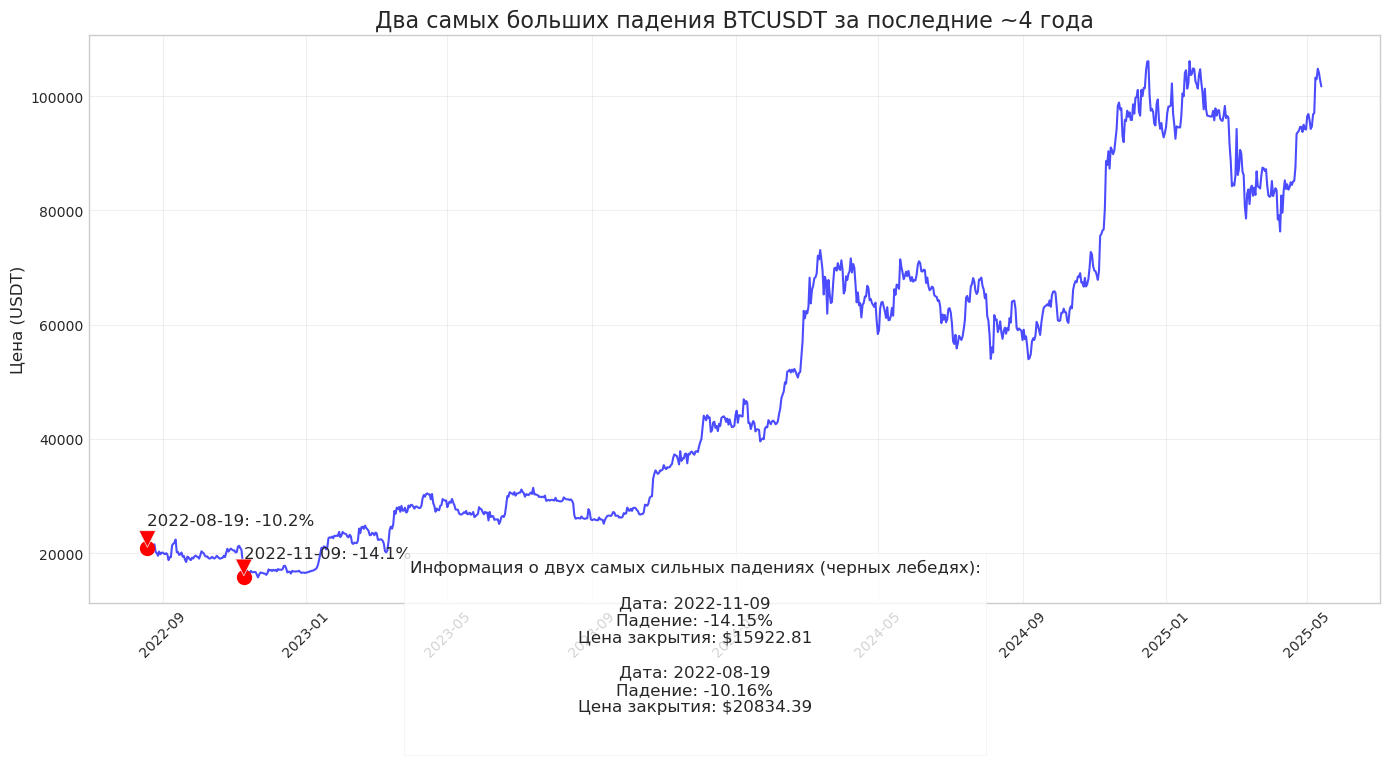

Два самых сильных падения BTCUSDT за последние ~4 года:

#1: 2022-11-09
Падение: -14.15%
Цена открытия: $18545.38
Цена закрытия: $15922.81
Изменение за день: $-2622.57

#2: 2022-08-19
Падение: -10.16%
Цена открытия: $23191.45
Цена закрытия: $20834.39
Изменение за день: $-2357.06


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime

# Функция для получения исторических данных с Binance
def get_binance_data(symbol, interval='1d', limit=1000):
    url = "https://api.binance.com/api/v3/klines"
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    df = pd.DataFrame(data, columns=['open_time', 'open', 'high', 'low', 'close', 'volume', 
                                     'close_time', 'quote_volume', 'trades', 'taker_buy_base', 
                                     'taker_buy_quote', 'ignore'])
    
    # Преобразуем типы данных
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
    df['close'] = df['close'].astype(float)
    df.set_index('open_time', inplace=True)
    
    return df

# Получаем данные за последние 1000 дней (примерно 4 года торгов)
btc_data = get_binance_data('BTCUSDT', interval='1d', limit=1000)

# Рассчитываем дневные доходности
btc_data['return'] = btc_data['close'].astype(float).pct_change() * 100
btc_data = btc_data.dropna()

# Находим два самых больших падения (черных лебедя)
black_swans = btc_data.sort_values('return').head(2)

# Создаем график
plt.figure(figsize=(14, 8))

# График цены BTC
plt.plot(btc_data.index, btc_data['close'].astype(float), color='blue', alpha=0.7)

# Отмечаем черных лебедей на графике
for date, row in black_swans.iterrows():
    plt.plot(date, float(row['close']), 'ro', markersize=10)
    plt.annotate(f"{date.strftime('%Y-%m-%d')}: {row['return']:.1f}%", 
                xy=(date, float(row['close'])),
                xytext=(date, float(row['close']) * 1.2),
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=12)

# Настройка графика
plt.title('Два самых больших падения BTCUSDT за последние ~4 года', fontsize=16)
plt.ylabel('Цена (USDT)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.figtext(0.5, 0.01, info_text, ha='center', fontsize=12, 
           bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# Выводим дополнительную информацию
print("Два самых сильных падения BTCUSDT за последние ~4 года:")
for i, (date, row) in enumerate(black_swans.iterrows(), 1):
    print(f"\n#{i}: {date.strftime('%Y-%m-%d')}")
    print(f"Падение: {row['return']:.2f}%")
    print(f"Цена открытия: ${float(row['open']):.2f}")
    print(f"Цена закрытия: ${float(row['close']):.2f}")
    print(f"Изменение за день: ${float(row['close']) - float(row['open']):.2f}")

# 5. Что такое розовый фламинго
"Розовый фламинго" (Pink Flamingo) — это термин, введенный как развитие концепции "черного лебедя", но с иной смысловой нагрузкой. Это событие, которое:

* В отличие от "черного лебедя", является заметным и предсказуемым
* Воспринимается как маловероятное или игнорируется большинством участников рынка
* При наступлении имеет значительное влияние на рынки

Другими словами, "розовый фламинго" — это "слон в комнате", которого все видят, но предпочитают игнорировать

### Жилищный пузырь 
Жилищный пузырь перед кризисом 2008 года: Были явные признаки перегрева рынка недвижимости и проблем в сфере субстандартной ипотеки, но большинство участников рынка игнорировали эти сигналы


### Что с этим делать?
* Признавать возможность экстремальных движений рынка: Пересмотреть оценки риска, используя модели с толстыми хвостами (например, распределение Стьюдента вместо нормального)
* Использовать разумное плечо: Объем левериджа должен учитывать возможность экстремальных движений цены.
* Диверсификация и хеджирование: Использовать инструменты, которые могут выигрывать от повышенной волатильности (опционы, некоррелированные активы)
* Стресс-тестирование портфеля: Регулярно проверять, как портфель отреагирует на экстремальные сценарии (падение на 20%, 30%, 50% и т.д.)
* Управление позиционированием: Избегать концентрации рисков и чрезмерных позиций относительно размера капитала
* Поиск "розовых фламинго": Активно анализировать рынок на предмет очевидных, но игнорируемых рисков, которые могут стать источниками будущей волатильности

In [1]:
from IPython.display import Image

Image(url='https://cdn.azbooka.ru/cv/w1100/4dd602de-e97a-4036-b274-3291d333e829.jpg')
